In [8]:
# Connect to Quantum Inspire QI using TOKEN file.
import models.connect_quantum_inspire as qi_tools
import models.quantum_state_circuits as qs_circuits
import importlib
import numpy as np
from qiskit import execute
from qiskit.circuit import QuantumRegister, ClassicalRegister, QuantumCircuit
import matplotlib.pyplot as plt

importlib.reload(qi_tools)
importlib.reload(qs_circuits)

qi_tools.connect_qi('../TOKEN')

In [3]:
from quantuminspire.qiskit import QI
qi_backend = QI.get_backend('QX single-node simulator')

In [57]:
def measure_circuit_correlation(dcircuit, q, b, measurement_directions, shots=1000):
    expectation_list = []
    results = {'00': [], '01': [], '10': [], '11': []}
    for i in range(np.size(measurement_directions,1)):
        circuit = dcircuit.copy()
        theta1 = measurement_directions[0,i]
        phi1 = measurement_directions[1,i]
        theta2 = measurement_directions[2,i]
        phi2 = measurement_directions[3,i]
        
        circuit, q,b = qs_circuits.measure_arbitrary(circuit, q, b, 0, theta1, phi1)
        circuit, q,b = qs_circuits.measure_arbitrary(circuit, q, b, 1, theta2, phi2)
        
        qi_job = execute(circuit, backend=qi_backend, shots=shots)
        qi_result = qi_job.result()
        probabilities_histogram = qi_result.get_probabilities(circuit)
        spins = [-(sum(map(int,list(state)))%2*2-1) for state, val in probabilities_histogram.items()]
        expectation_list.append(sum([spins[i]*val for i, val in enumerate(probabilities_histogram.values())]))
        for key in results.keys():
            if key not in probabilities_histogram.keys():
                results[key].append(0)
            else:
                results[key].append(probabilities_histogram[key])
    return expectation_list, results

In [74]:
theta_vals = np.linspace(0, np.pi, 30)
phi_vals = np.zeros_like(theta_vals)
measurement_directions = np.array([theta_vals, phi_vals, theta_vals, phi_vals])

In [75]:
measurement_directions

array([[0.        , 0.10833078, 0.21666156, 0.32499234, 0.43332312,
        0.54165391, 0.64998469, 0.75831547, 0.86664625, 0.97497703,
        1.08330781, 1.19163859, 1.29996937, 1.40830016, 1.51663094,
        1.62496172, 1.7332925 , 1.84162328, 1.94995406, 2.05828484,
        2.16661562, 2.2749464 , 2.38327719, 2.49160797, 2.59993875,
        2.70826953, 2.81660031, 2.92493109, 3.03326187, 3.14159265],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.10833078, 0.21666156, 0.32499234, 0.43332312,
        0.54165391, 0.64998469, 0.75831547, 0.86664625, 0.97497703,
        1.08330781, 1.19163859, 1.29996937, 1.

In [76]:
# Regenerating Figure 6 from J. Brody and G. Guzman, "Calculating spin correlations with a quantum computer", doi: 10.1119/10.0001967
# Get Expectation value for singlet state
circuit, q,b = qs_circuits.create_entangled_singlet()
circuit.barrier()
expectation_list_singlet = measure_circuit_correlation(circuit, q, b, measurement_directions)

# Get Expectation value for triplet state
circuit, q,b = qs_circuits.create_entangled_triplet()
circuit.barrier()
expectation_list_triplet = measure_circuit_correlation(circuit, q, b, measurement_directions)

# Get Expectation value for product state
circuit, q,b = qs_circuits.create_product_state(0)
circuit.barrier()
expectation_list_product0 = measure_circuit_correlation(circuit, q, b, measurement_directions)
circuit, q,b = qs_circuits.create_product_state(1)
circuit.barrier()
expectation_list_product1 = measure_circuit_correlation(circuit, q, b, measurement_directions)

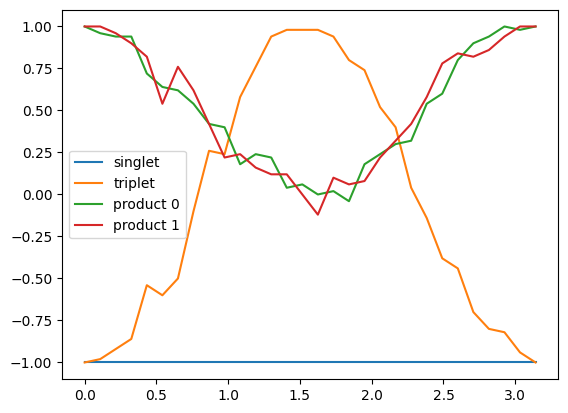

In [77]:
import matplotlib.pyplot as plt
plt.plot(theta_vals, np.array([expectation_list_singlet, expectation_list_triplet, expectation_list_product0, expectation_list_product1]).T)
plt.legend(['singlet', 'triplet', 'product 0', 'product 1'])

In [ ]:
# Regenerating Figure 6 from J. Brody and G. Guzman, "Calculating spin correlations with a quantum computer", doi: 10.1119/10.0001967
# Get Expectation value for singlet state
circuit, q, b = qs_circuits.create_entangled_singlet()
circuit.barrier()
circuit.delay(5)
expectation_list_singlet = measure_circuit_correlation(circuit, q, b, measurement_directions)

# Get Expectation value for triplet state
circuit, q, b = qs_circuits.create_entangled_triplet()
circuit.delay(5)
circuit.barrier()
expectation_list_triplet = measure_circuit_correlation(circuit, q, b, measurement_directions)

# Get Expectation value for product state
circuit, q, b = qs_circuits.create_product_state(0)
circuit.delay(5)
circuit.barrier()
expectation_list_product0 = measure_circuit_correlation(circuit, q, b, measurement_directions)
circuit, q, b = qs_circuits.create_product_state(1)
circuit.delay(5)
circuit.barrier()

expectation_list_product1 = measure_circuit_correlation(circuit, q, b, measurement_directions)

plt.plot(theta_vals, np.array(
    [expectation_list_singlet, expectation_list_triplet, expectation_list_product0, expectation_list_product1]).T)
plt.legend(['singlet', 'triplet', 'product 0', 'product 1'])

In [58]:
# a b
theta_vals = np.zeros((30))
theta2_vals = np.linspace(0, np.pi, 30)
phi_vals=np.zeros_like(theta_vals)
measurement_directions = np.array([theta_vals, phi_vals, theta2_vals, phi_vals])

circuit, q, b = qs_circuits.create_entangled_singlet()
circuit.barrier()
expectation_list_singlet_ab, _ = measure_circuit_correlation(circuit, q, b, measurement_directions)

In [59]:
# a b'
theta_vals = np.zeros((30))
theta2_vals = np.linspace(0, np.pi, 30)+np.pi/2

phi_vals=np.zeros_like(theta_vals)
measurement_directions = np.array([theta_vals, phi_vals, theta2_vals, phi_vals])

circuit, q, b = qs_circuits.create_entangled_singlet()
circuit.barrier()
expectation_list_singlet_abp, _ = measure_circuit_correlation(circuit, q, b, measurement_directions)

In [60]:
# a' b'
theta_vals = np.zeros((30))+np.pi/2
theta2_vals = np.linspace(0, np.pi, 30)+np.pi/2
phi_vals=np.zeros_like(theta_vals)
measurement_directions = np.array([theta_vals, phi_vals, theta2_vals, phi_vals])

circuit, q, b = qs_circuits.create_entangled_singlet()
circuit.barrier()
expectation_list_singlet_apbp, _ = measure_circuit_correlation(circuit, q, b, measurement_directions)

In [61]:
# a' b
theta_vals = np.zeros((30))+np.pi/2
theta2_vals = np.linspace(0, np.pi, 30)
phi_vals=np.zeros_like(theta_vals)
measurement_directions = np.array([theta_vals, phi_vals, theta2_vals, phi_vals])

circuit, q, b = qs_circuits.create_entangled_singlet()
circuit.barrier()
expectation_list_singlet_apb, _ = measure_circuit_correlation(circuit, q, b, measurement_directions)

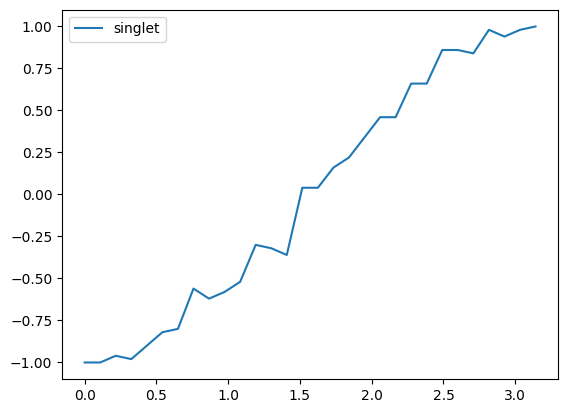

Text(0, 0.5, 'S?')

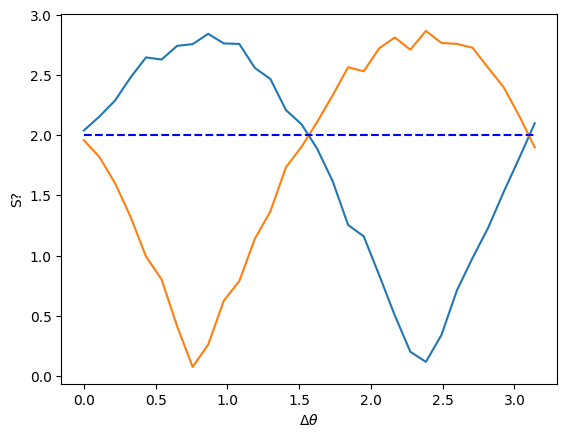

In [65]:
## Plot Bells Inequality

plt.plot(np.linspace(0,np.pi,30), np.abs(np.array(expectation_list_singlet_ab)-np.array(expectation_list_singlet_abp))+np.abs(np.array(expectation_list_singlet_apbp)+np.array(expectation_list_singlet_apb)))
plt.plot(np.linspace(0,np.pi,30), np.abs(np.array(expectation_list_singlet_ab)+np.array(expectation_list_singlet_abp))+np.abs(np.array(expectation_list_singlet_apbp)-np.array(expectation_list_singlet_apb)))
# Plot blue dotted line at y=2 to show violation of Bell's inequality for singlet state, i.e. first inequality
plt.plot(np.linspace(0,np.pi,30), np.ones_like(np.linspace(0,np.pi,30))*2, 'blue', linestyle='--')


plt.xlabel('$\\Delta \\theta$')
plt.ylabel('S?')

Text(0.5, 0, '$\\Delta \\theta$')

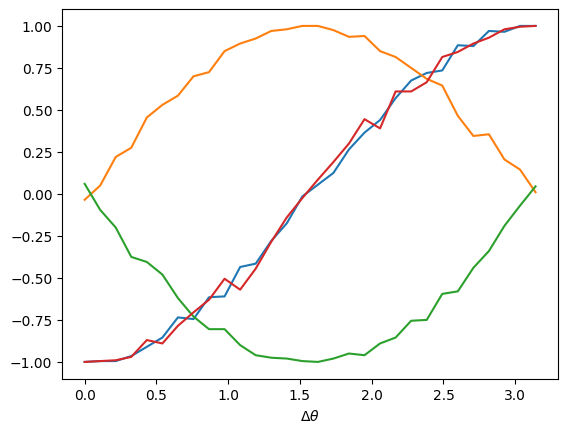

In [56]:
## Plot Bells Inequality

plt.plot(np.linspace(0,np.pi,30), np.array(expectation_list_singlet_ab))
plt.plot(np.linspace(0,np.pi,30), np.array(expectation_list_singlet_abp))
plt.plot(np.linspace(0,np.pi,30), np.array(expectation_list_singlet_apb))
plt.plot(np.linspace(0,np.pi,30), np.array(expectation_list_singlet_apbp))

plt.xlabel('$\\Delta \\theta$') 